In [1]:
import numpy as np
import pandas as pd
import math   as m
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.metrics import mean_squared_error ,mean_absolute_error ,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
def Vsualize(column_name,data):
    
    values = data[column_name].value_counts().values.round(2)
    index = data[column_name].value_counts().index
    
    color = sns.color_palette('RdBu')
    plt.figure(figsize=(7,5))
    # pie chart of column
    plt.subplot(1, 2, 1)
    plt.title(f'Distribution of {column_name}')
    plt.pie(values, labels=index,autopct='%1.1f%%',colors=color)
    
    # Distribution of column
    plt.subplot(1, 2, 2)
    sns.histplot(data[column_name])
    plt.ylabel(f'Number of {column_name}')
    plt.tight_layout()
    plt.show()

In [3]:
def train_test_model(model,x_train,x_test,y_train,y_test):
    # Train model 
    model.fit(x_train,y_train) 
    
    # Test model
    y_predict = model.predict(x_test)

    #Evaluate Model
    print(f"R2 Score =  {r2_score(y_test,y_predict) * 100:.2f}%")
    print('Mean Absolute Error = ',mean_absolute_error(y_test, y_predict))
    print('Mean Squared Error = ',mean_squared_error(y_test, y_predict))
    print('Root Mean Squared Error = ',m.sqrt(mean_squared_error(y_test, y_predict)))
    
    # Scatter plot for real and predict data
    plt.scatter(y_test,y_predict)
    return model

In [4]:
path = 'Advertising.csv'
data = pd.read_csv(path)

In [5]:
data.shape

(200, 5)

In [6]:
data.sample(10)

,Unnamed: 0,TV,Radio,Newspaper,Sales
143,144,104.6,5.7,34.4,10.4
38,39,43.1,26.7,35.1,10.1
111,112,241.7,38.0,23.2,21.8
72,73,26.8,33.0,19.3,8.8
122,123,224.0,2.4,15.6,11.6
152,153,197.6,23.3,14.2,16.6
183,184,287.6,43.0,71.8,26.2
41,42,177.0,33.4,38.7,17.1
190,191,39.5,41.1,5.8,10.8
171,172,164.5,20.9,47.4,14.5


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [9]:
data.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [10]:
data.duplicated().sum()

0

In [11]:
data.shape

(200, 5)

In [12]:
data.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
data.drop('Unnamed: 0',axis = 1,inplace = True)

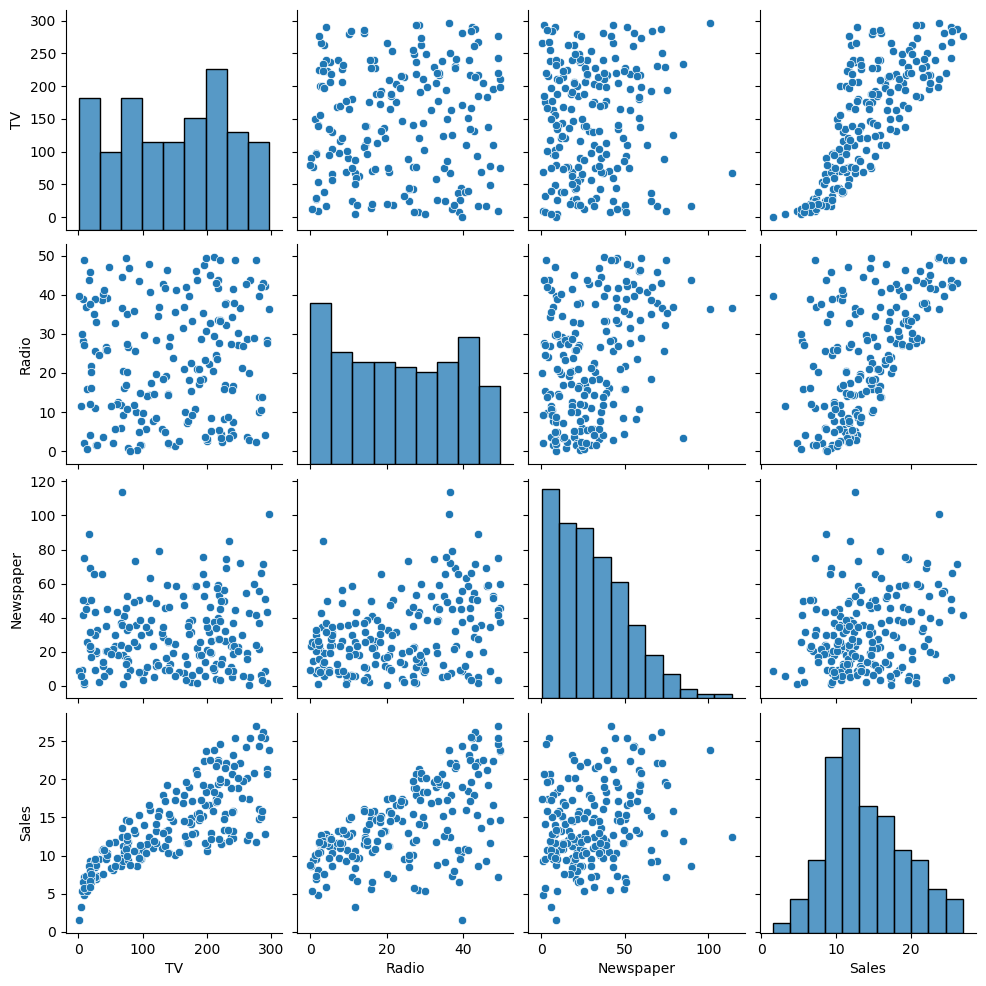

In [14]:
sns.pairplot(data)

In [15]:
correlation = data.corr()

In [16]:
correlation

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


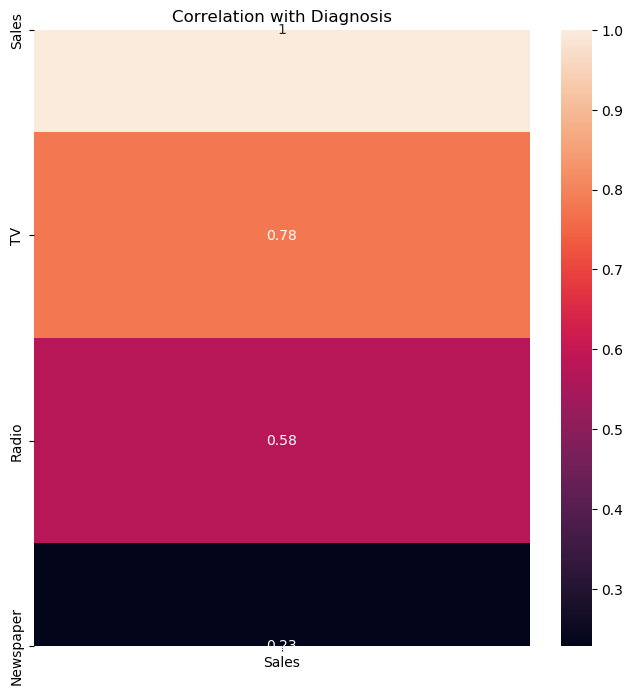

In [17]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation[['Sales']].sort_values(by='Sales', ascending=False), annot=True)
plt.title("Correlation with Diagnosis")
plt.show()

In [18]:
x =data.drop('Sales',axis = 1)
y = data['Sales']

In [19]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=45)


R2 Score =  89.56%
Mean Absolute Error =  1.0788802763848646
Mean Squared Error =  2.2564942472809344
Root Mean Squared Error =  1.5021631892976657


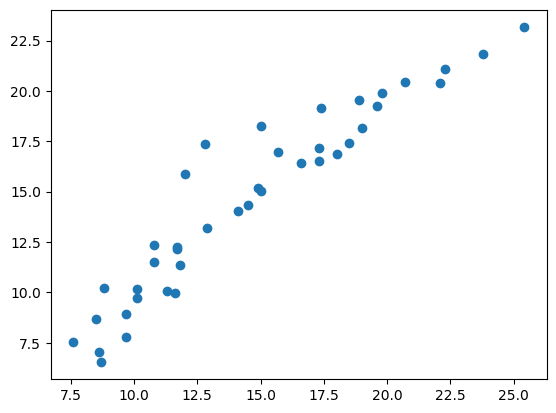

In [21]:
LR = train_test_model(LinearRegression(),x_train,x_test,y_train,y_test)

In [22]:
# the coefficients
LR.coef_
# The coefficients in a dataframe
cdata = pd.DataFrame(LR.coef_,x.columns,columns=['Coef'])
cdata.reset_index()

,index,Coef
0,TV,13.896014
1,Radio,9.099685
2,Newspaper,-0.553100


R2 Score =  95.04%
Mean Absolute Error =  0.7825000000000002
Mean Squared Error =  1.0712500000000005
Root Mean Squared Error =  1.0350120772242228


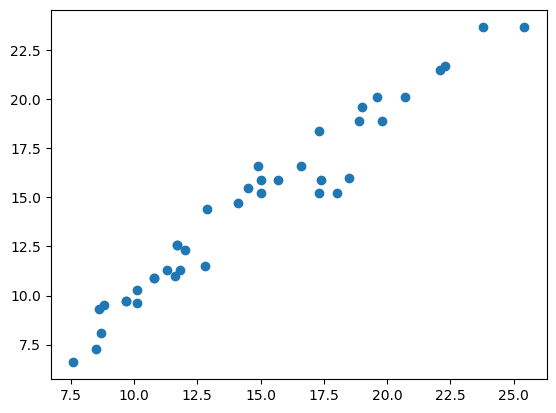

In [23]:
DR = train_test_model(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

In [24]:
importances = DR.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.642403
1,Radio,0.354611
2,Newspaper,0.002986


R2 Score =  97.88%
Mean Absolute Error =  0.5356999999999983
Mean Squared Error =  0.45771759999999684
Root Mean Squared Error =  0.6765482983497902


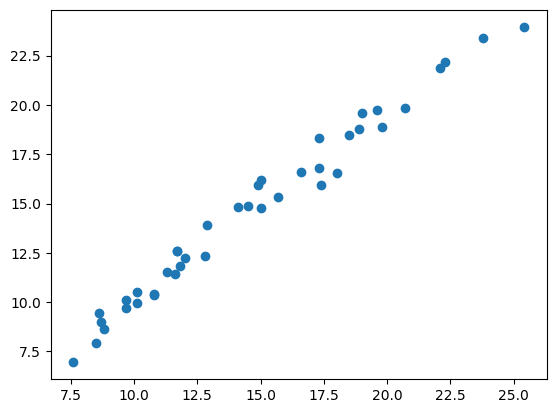

In [25]:
RF = train_test_model(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [26]:
importances = RF.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.649363
1,Radio,0.341864
2,Newspaper,0.008773


R2 Score =  97.04%
Mean Absolute Error =  0.6471777749061585
Mean Squared Error =  0.640186727846026
Root Mean Squared Error =  0.8001166963924863


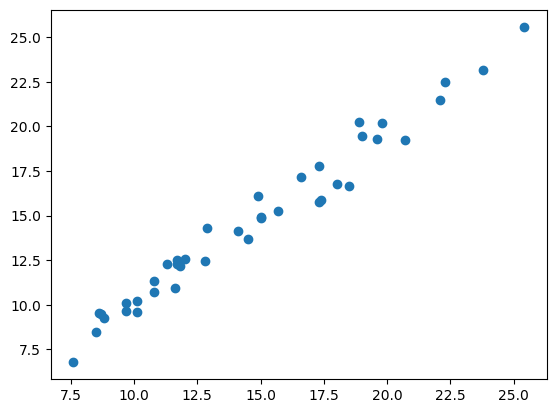

In [27]:
XG = train_test_model(XGBRegressor(),x_train,x_test,y_train,y_test)


In [28]:
importances = XG.feature_importances_
feature_names = x.columns
importance_data= pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_data = importance_data.sort_values(by='Importance', ascending=False)
importance_data

,Feature,Importance
0,TV,0.588271
1,Radio,0.409121
2,Newspaper,0.002609
